# Análise do COVID-19 no Brasil (Infectados)

## 1. Base de Dados Original

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,99,117,129,149,149,197,238,428,566,673
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,27,32,32,39,46,64,64,73,103,103
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,38,48,55,65,65,92,112,134,171,210
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,11,15,18,21,21,36,49,57,71,94
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,15,15,18,20,20,35,46,61,68,78
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,2,2,2,3,3,5,7,7,7,33


## 2. Total de casos diários no mundo (ordenação decrescente)

In [2]:
def getSortedGroupByCountryDataframe(df):
    confirmedCasesGroupedDf = df.groupby('Country/Region').sum()
    sortedConfirmedCasesGroupedDf = confirmedCasesGroupedDf.sort_values(by=['Confirmed Cases'], ascending = False)
    return sortedConfirmedCasesGroupedDf

In [3]:
confirmedCasesDf = df.copy()
column_list = list(confirmedCasesDf)
column_list = column_list[-1:]
confirmedCasesDf = confirmedCasesDf.drop(['Province/State', 'Lat', 'Long'], axis=1)
confirmedCasesDf["Confirmed Cases"] = confirmedCasesDf[column_list].astype('int32')

sortedConfirmedCasesGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesDf)
sortedConfirmedCasesGroupedDf.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80860,80887,80921,80932,80945,80977,81003,81033,81058,81058
Italy,0,0,0,0,0,0,0,0,0,2,...,9172,10149,12462,12462,17660,21157,24747,27980,31506,31506
Iran,0,0,0,0,0,0,0,0,0,0,...,7161,8042,9000,10075,11364,12729,13938,14991,16169,16169
Spain,0,0,0,0,0,0,0,0,0,0,...,1073,1695,2277,2277,5232,6391,7798,9942,11748,11748
Germany,0,0,0,0,0,1,4,4,4,5,...,1176,1457,1908,2078,3675,4585,5795,7272,9257,9257
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,7478,7513,7755,7869,7979,8086,8162,8236,8320,8320
France,0,0,2,3,3,3,4,5,5,5,...,1217,1792,2290,2290,3678,4487,4523,6668,7699,7699
US,1,1,2,2,5,5,5,5,5,7,...,583,959,1281,1663,2179,2727,3499,4632,6421,6421
Switzerland,0,0,0,0,0,0,0,0,0,0,...,374,491,652,652,1139,1359,2200,2200,2700,2700


### 2.1 Total de casos diários somente no Brasil

In [4]:
confirmedCasesByDayBrazilDf = sortedConfirmedCasesGroupedDf.loc[['Brazil']]
confirmedCasesByDayBrazilDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,0,0,0,0,0,0,0,0,0,0,...,25,31,38,52,151,151,162,200,321,321


In [5]:
dates = list(confirmedCasesByDayBrazilDf)[:-1]
infected = confirmedCasesByDayBrazilDf.iloc[0,:-1]

dfForPlot = pd.DataFrame(
    {'date': dates, 'infected': infected})
dfForPlot['date'] = pd.to_datetime(dfForPlot['date'])
dfForPlot.tail()

,date,infected
3/13/20,2020-03-13,151
3/14/20,2020-03-14,151
3/15/20,2020-03-15,162
3/16/20,2020-03-16,200
3/17/20,2020-03-17,321


Text(0, 0.5, 'Number of cases')

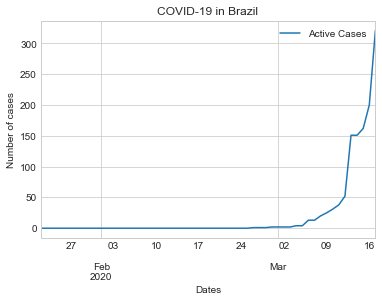

In [6]:
fig = plt.figure()
ax = plt.axes()
dfForPlot.set_index('date')['infected'].plot(legend=True, grid=True, label='Active Cases');
plt.title("COVID-19 in Brazil")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

## 3. Total de casos diários acumulados por país (ordenação decrescente)

In [7]:
confirmedCasesOnlyDf = confirmedCasesDf.drop(confirmedCasesDf.columns.difference(['Country/Region','Confirmed Cases']), 1)
confirmedCasesOnlyDf = confirmedCasesOnlyDf.sort_values(by=['Confirmed Cases'],ascending=False)

sortedConfirmedCasesOnlyGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesOnlyDf)
sortedConfirmedCasesOnlyGroupedDf

,Confirmed Cases
Country/Region,
China,81058
Italy,31506
Iran,16169
Spain,11748
Germany,9257
...,...
Congo (Brazzaville),1
Suriname,1
Sudan,1


### 3.1 Total de casos diários acumulados no Brasil

In [8]:
confirmedCasesTotalBrazilDf = sortedConfirmedCasesOnlyGroupedDf.loc[['Brazil']]
confirmedCasesTotalBrazilDf

,Confirmed Cases
Country/Region,
Brazil,321


## 4. Previsão por meio da Regressão

### 4.0 Dados comuns a todos os algoritmos abaixo

In [9]:
def convertCategoricalToNumeric(X, starter):
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X = labelencoder_X.fit_transform(X) + starter

    #one hot encoding
    #X = pd.get_dummies(X).values
    #X = np.delete(X, 0, axis=1)
    return X

In [10]:
def plotRegression(XTrain, XTest, yTrain, yTest):
    fig = plt.figure()
    ax = plt.axes()

    XFinal = np.append(XTrain, XTest)
    yFinal = np.append(yTrain, yTest)
    plt.plot(XFinal, yFinal, '-b', label='Active Cases')
    plt.title("COVID-19 in Brazil (Linear Regression)")
    plt.xlabel("Dates")
    plt.ylabel("Number of cases")
    plt.legend()

In [11]:
XTrain = dfForPlot['date']
yTrain = dfForPlot['infected']

from datetime import date, timedelta
XTest = pd.date_range(date.today() + timedelta(days=1), periods=100, freq='D').to_series()

XTrain = convertCategoricalToNumeric(XTrain, 0)
XTest = convertCategoricalToNumeric(XTest, len(XTrain))

### 4.1 Regressão Linear

In [12]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(XTrain.reshape(-1, 1), yTrain)
LRModel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#predição
yTest = LRModel.predict(XTest.reshape(-1, 1)) + yTrain[-1]
yTest.astype(int)

array([400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424,
       426, 428, 430, 432, 434, 436, 438, 440, 442, 444, 446, 448, 450,
       452, 454, 456, 458, 460, 463, 465, 467, 469, 471, 473, 475, 477,
       479, 481, 483, 485, 487, 489, 491, 493, 495, 497, 499, 501, 503,
       505, 507, 509, 511, 513, 515, 517, 519, 521, 523, 525, 527, 529,
       531, 534, 536, 538, 540, 542, 544, 546, 548, 550, 552, 554, 556,
       558, 560, 562, 564, 566, 568, 570, 572, 574, 576, 578, 580, 582,
       584, 586, 588, 590, 592, 594, 596, 598, 600])

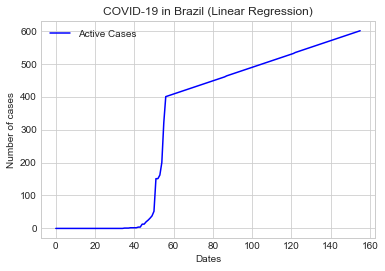

In [18]:
plotRegression(XTrain, XTest, yTrain.astype(int), yTest.astype(int))